In [2]:
# import relevant libraries 
import pandas as pd
import numpy as np
import atoti as tt
import re

Welcome to Atoti 0.8.7!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [3]:
# Load the data 
df = pd.read_csv('burritos_01022018.csv')

In [4]:
df.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'overall',
       'Rec', 'Reviewer', 'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico',
       'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp',
       'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots',
       'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito',
       'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Queso',
       'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini'],
      dtype='object')

In [5]:
df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Queso
count,82.000000,82.000000,378.000000,382.000000,22.000000,22.000000,251.000000,249.000000,249.000000,385.000000,365.000000,373.000000,383.000000,377.000000,383.000000,363.000000,383.000000,383.000000,383.000000,0.0
mean,3.898780,4.174390,7.048280,3.499895,546.181818,0.675277,20.072988,22.098996,0.785462,3.486104,3.741096,3.596247,3.527546,3.564403,3.422324,3.348485,3.576371,3.995561,3.604813,NaN
std,0.470748,0.377389,1.517983,0.808791,144.445619,0.080468,2.060584,1.795010,0.153465,0.787282,0.975079,0.835896,0.812342,0.987858,1.061032,0.927714,0.896275,1.107876,0.761901,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,3.000000,3.500000,3.000000,NaN
50%,4.000000,4.200000,6.950000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.750000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,3.750000,NaN
75%,4.000000,4.400000,7.750000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.100000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [7]:
df.columns = [re.sub("([\(\[]).*?([\)\]])", "", x).strip() for x in df.columns]
df.columns = [x.replace(':','_').strip() for x in df.columns]

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/var/folders/d5/vbj88h9n3_n9v38rcw6lr2xc0000gn/T/ipykernel_50088/1490044899.py:1: SyntaxWarning: invalid escape sequence '\('
  df.columns = [re.sub("([\(\[]).*?([\)\]])", "", x).strip() for x in df.columns]


In [8]:
df.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass', 'Density', 'Length',
       'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat_filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'overall',
       'Rec', 'Reviewer', 'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico',
       'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp',
       'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots',
       'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito',
       'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Queso',
       'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini'],
      dtype='object')

In [9]:
# Check for any null values in the data set
df.isnull().any()
# Check the % of the column that is null
df.isnull().sum() / df.shape[0]

Location        0.000000
Burrito         0.000000
Date            0.000000
Neighborhood    0.774026
Address         0.784416
                  ...   
Bacon           0.992208
Sushi           0.994805
Avocado         0.966234
Corn            0.992208
Zucchini        0.997403
Length: 66, dtype: float64

In [10]:
#create an atoti session and store dashboard files in ./content
session = tt.Session(user_content_storage = './content', port = 9000)

In [11]:
# Normalize the circumference, volume, length, mass, and cost data points
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
burrito_vars_norm = df.loc[:,['Circum', 'Volume', 'Length', 'Mass', 'Cost']]

# Changing the scaling from 0-1 to 0-10 
bnorms = scaler.fit_transform(burrito_vars_norm)*10

# Adding the normalized data into the dataframe (df)
df[['Circum_norm', 'Volume_norm', 'Length_norm', 'Mass_norm', 'Cost_norm']] = bnorms

In [12]:
df.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass', 'Density', 'Length',
       'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat_filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'overall',
       'Rec', 'Reviewer', 'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico',
       'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp',
       'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots',
       'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito',
       'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Queso',
       'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini',
       'Circum_norm', 'Volume_norm', 'Length_norm', 'Mass_norm', 'Cost_norm'],
      dtype='object')

In [13]:
burrito_vars = pd.melt(df.reset_index(), 
                            id_vars = ['Location','Burrito'], 
                            value_vars = ['Circum_norm','Volume_norm','Length_norm','Mass_norm','Cost_norm'],)
burrito_vars            

,Location,Burrito,variable,value
0,Donato's taco shop,California,Circum_norm,NaN
1,Oscar's Mexican food,California,Circum_norm,NaN
2,Oscar's Mexican food,Carnitas,Circum_norm,NaN
3,Oscar's Mexican food,Carne asada,Circum_norm,NaN
4,Pollos Maria,California,Circum_norm,NaN
...,...,...,...,...
1920,Rigoberto's Taco Shop,California,Cost_norm,1.753748
1921,Rigoberto's Taco Shop,California,Cost_norm,1.753748
1922,Burrito Box,Steak with guacamole,Cost_norm,3.866424
1923,Taco Stand,California,Cost_norm,2.226261


In [14]:
#upload dataframe to atoti session 
burrito_table = session.read_pandas(df,table_name = 'burritos')

In [15]:
burrito_table.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Bacon,Sushi,Avocado,Corn,Zucchini,Circum_norm,Volume_norm,Length_norm,Mass_norm,Cost_norm
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,N/A,6.49,...,N/A,N/A,N/A,N/A,N/A,<NA>,<NA>,<NA>,<NA>,1.590186
1,Nico's Taco Shop,Carnitas,1/30/2016,N/A,N/A,N/A,<NA>,<NA>,N/A,6.99,...,N/A,N/A,N/A,N/A,N/A,<NA>,<NA>,<NA>,<NA>,1.817356
2,Lolita's taco shop,Adobado,2/24/2016,N/A,N/A,N/A,<NA>,<NA>,N/A,5.5,...,N/A,N/A,N/A,N/A,N/A,<NA>,<NA>,<NA>,<NA>,1.140391
3,Colima's Mexican Food,Bandido,3/3/2016,N/A,N/A,N/A,<NA>,<NA>,N/A,6.49,...,N/A,N/A,N/A,N/A,N/A,<NA>,<NA>,<NA>,<NA>,1.590186
4,Raul's Mexican food,carne asada,3/11/2016,N/A,N/A,N/A,<NA>,<NA>,N/A,5.0,...,N/A,N/A,N/A,N/A,N/A,<NA>,<NA>,<NA>,<NA>,0.913221


In [16]:
# create data cube
cube = session.create_cube(burrito_table)

In [17]:
# create hierarchies, levels, and measures
h = cube.hierarchies 
l = cube.levels
m = cube.measures

In [18]:
# Create New measures
m['five'] = 5
m['lenXwrap'] = m['Length.MEAN'] * m['Wrap.MEAN']

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
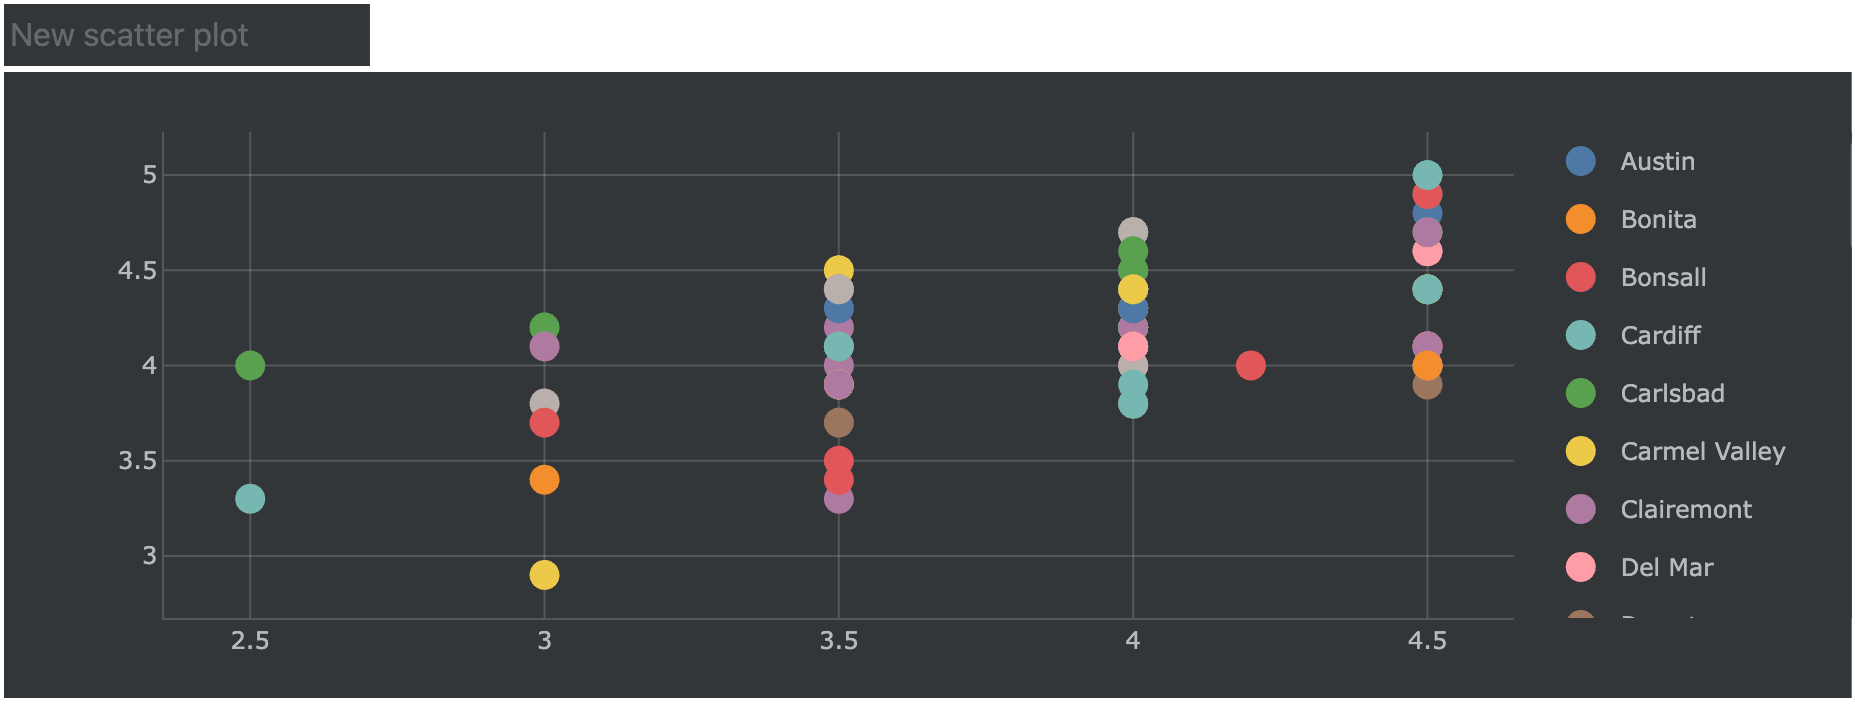

In [20]:
# create scatterplot visual
session.visualize('scatter plot neighborhood yelp vs google')

In [22]:
# add reformatted data to table to visualize
burrito_var_table = session.read_pandas(burrito_vars, table_name = 'burrito_variables', 
                                        keys=['Location', 'Burrito', 'variable'])

In [23]:
# join main dataframe with new burrito_var_table
burrito_table.join(burrito_var_table)

In [29]:
# create value measure in atoti with values for each of the burrito variables 
# that we made above (mass, circum, cost, etc.)
m['value'] = tt.agg.mean(burrito_var_table["value"])
m['aggvalue'] = tt.agg.mean(m['value'], scope = tt.OriginScope(l['Location'],l['Burrito'],l['variable']))

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
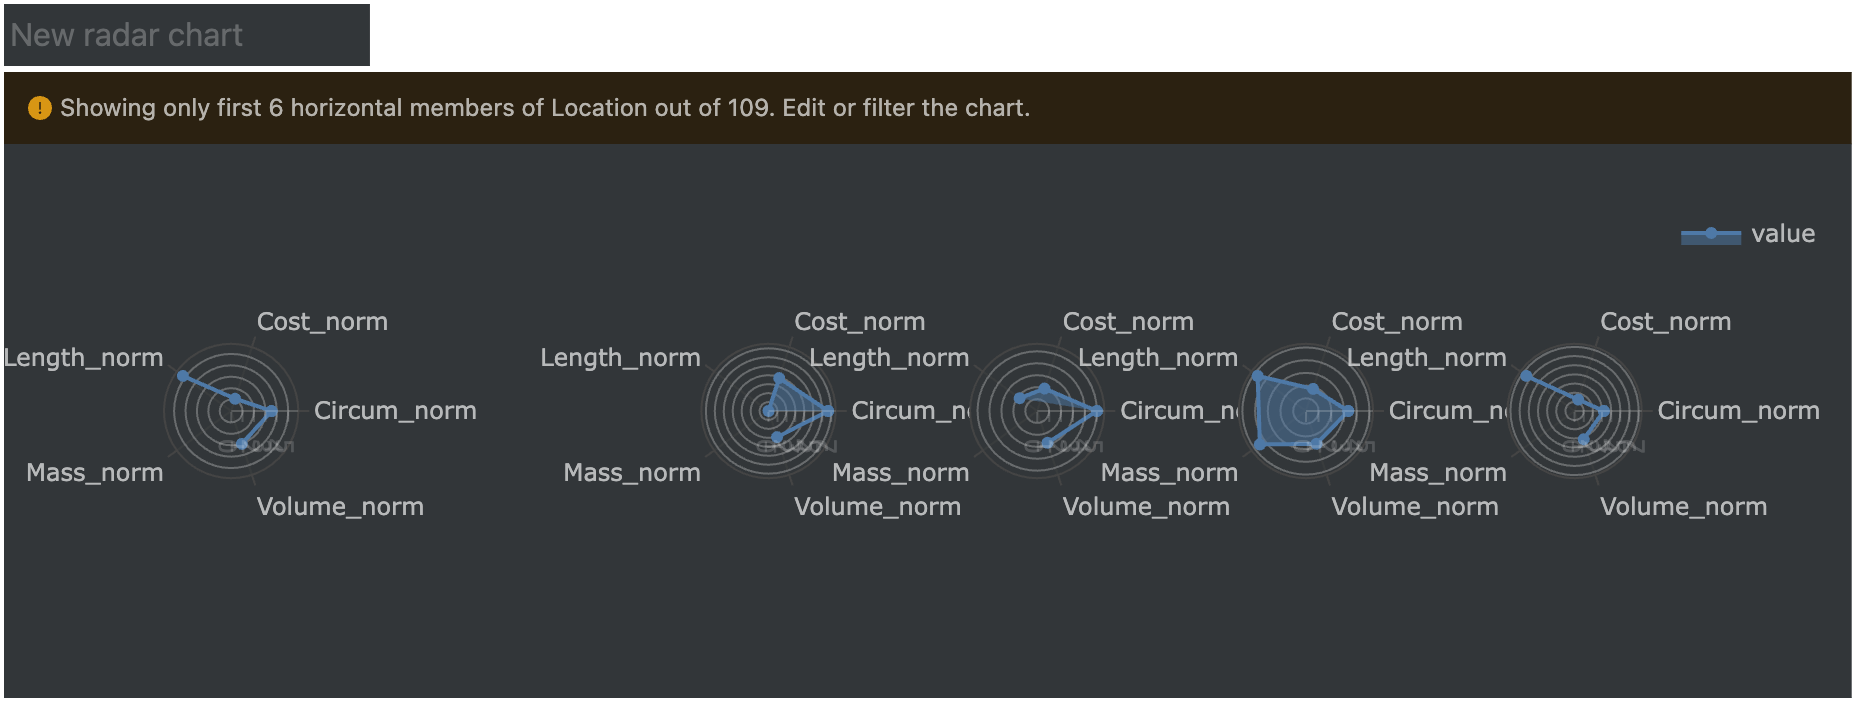

In [27]:
# create radar chart
session.visualize("radar chart final")

In [30]:
# new data for yelp gauge
m["four"] = 4

In [31]:
# new data for google gauge
m["four_google"] = 4.25

In [34]:
# Link to open the dashboard
session.link(path="/#/dashboard/ed7")

http://localhost:9000/#/dashboard/ed7

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.